# AV Big Data Frameworks Spark

Você foi contratado por uma empresa para efetuar uma análise de dados. Esta empresa possui acesso a uma base de dados com dados sobre incidentes criminais na cidade de Chicago desde 2001. Nesse cenário, para cada incidente criminal presente na base de dados são fornecidos os seguintes campos:
<table border="1" cellspacing="0" cellpadding="0" style="width: 389px; height: 235px;"> 
   <tbody> 
    <tr> 
     <td width="64" valign="top">Campo</td> 
     <td width="189" valign="top">Descrição</td> 
    </tr> 
    <tr> 
     <td width="64">Dia</td> 
     <td width="189">Dia da ocorrência</td> 
    </tr> 
    <tr> 
     <td width="64">Mês</td> 
     <td width="189">Mês da ocorrência</td> 
    </tr> 
    <tr> 
     <td width="64">Ano</td> 
     <td width="189">Ano da ocorrência</td> 
    </tr> 
    <tr> 
     <td width="64">Bloco</td> 
     <td width="189">Região da ocorrência</td> 
    </tr> 
    <tr> 
     <td width="64">Tipo</td> 
     <td width="189">Tipo da ocorrência criminal</td> 
    </tr> 
    <tr> 
     <td width="64">Descrição</td> 
     <td width="189">Breve descrição da ocorrência</td> 
    </tr> 
    <tr> 
     <td width="64">Descrição da localização</td> 
     <td width="189">Descrição sobre a localização da ocorrência, e.g. Rua</td> 
    </tr> 
    <tr> 
     <td width="64">Latitude</td> 
     <td width="189">Localização da ocorrência</td> 
    </tr> 
    <tr> 
     <td width="64">Longitude</td> 
     <td width="189">Localização da ocorrência</td> 
    </tr> 
   </tbody> 
  </table>
  
Diante desse contexto, você foi encarregado pelo desenvolvimento de um conjunto de soluções no Apache Spark, que permitam a extração das seguintes informações sobre a base:
<pre>
Quantidade de crimes por ano
Quantidade de crimes por ano que sejam do tipo NARCOTICS
Quantidade de crimes por ano, que sejam do tipo NARCOTICS, e tenham ocorrido em dias pares;
Mês com maior ocorrência de crimes;
Mês com a maior média de ocorrência de crimes;
Mês por ano com a maior ocorrência de crimes;
Mês com a maior ocorrência de crimes do tipo “DECEPTIVE PRACTICE”
Dia do ano com a maior ocorrência de crimes;
</pre>

In [1]:
'''from pyspark.sql import SparkSession
spark = SparkSession.builder \
   .master("local") \
   .appName("Big Data Frameworks") \
   .config("spark.executor.memory", "2gb") \
   .getOrCreate()
sc = spark.sparkContext
'''
# Find path to PySpark.
import findspark
findspark.init()

# Import PySpark and initialize SparkContext object.
import pyspark
sc = pyspark.SparkContext.getOrCreate()


In [31]:
rdd = sc.textFile('atividadespark/city_of_chicago_crimes_2001_to_present.csv')

In [9]:
count = rdd.count()
count

6747041

In [51]:
rdd.take(4)

['ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location',
 '10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,false,false,1111,011,28,25,04B,1144606,1903566,2015,02/10/2018 03:50:01 PM,41.891398861,-87.744384567,"(41.891398861, -87.744384567)"',
 '10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,true,false,0725,007,15,67,26,1166468,1860715,2015,02/10/2018 03:50:01 PM,41.773371528,-87.665319468,"(41.773371528, -87.665319468)"',
 '10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,0222,002,4,39,08B,1185075,1875622,2015,02/10/2018 03:50:01 PM,41.81386068,-87.596642837,"(41.81386068, -87.596642837)"']

## Adaptando o dataset para o do trabalho
1. remover o cabeçalho
2. extrair campos dia mes e ano manter o Primary Type
3. remover os outros campos desnecessários
4. Iremos manter os campos indice 5 e criaremos dia mes e ano pois é somente isso que a avaliação pede


In [52]:
header = rdd.take(1)
rdd = rdd.filter(lambda x: False if x[0:2].startswith('ID') else True).map(lambda x: x.split(','))
#noheader = rdd.filter(lambda x: False if x[0:2].startswith('ID') else True).map(lambda x: x.split('\t'))

In [54]:
def clean_data(line):
    data = line[2].split('/')
    dia = data[1]
    mes = data[0]
    ano = data[2][0:4]
    return [dia, mes, ano, line[5]]

In [55]:
#testando nossa função de limpeza
rdd.map(clean_data).take(3)

[['18', '03', '2015', 'BATTERY'],
 ['18', '03', '2015', 'OTHER OFFENSE'],
 ['18', '03', '2015', 'BATTERY']]

In [56]:
#efetivando a transformação
rdd_final = rdd.map(clean_data)

In [59]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# quantos crimes por ano?
dic = rdd_final.map(lambda x: x[2]).countByValue()

In [69]:
rdd_final.map(lambda kp: (kp[2], 1)).reduceByKey(lambda k,v: k + v).collect()

[('2001', 485749),
 ('2016', 268813),
 ('2011', 351749),
 ('2017', 267791),
 ('2008', 427038),
 ('2018', 229998),
 ('2002', 486753),
 ('2004', 469381),
 ('2014', 275200),
 ('2012', 335921),
 ('2006', 448097),
 ('2013', 307030),
 ('2015', 263929),
 ('2003', 475936),
 ('2007', 436999),
 ('2005', 453703),
 ('2010', 370290),
 ('2009', 392663)]

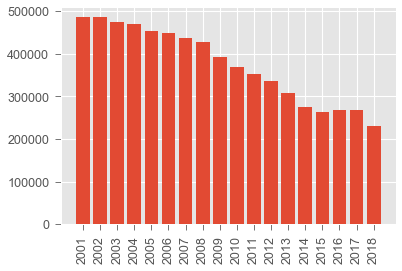

In [67]:
lists = sorted(dic.items()) 
x, y = zip(*lists) 
plt.xticks(rotation=90)
plt.bar(x, y)
plt.show()

In [50]:
noheader.map(lambda x: x[5]).distinct().take(35)

['PROSTITUTION',
 'WEAPONS VIOLATION',
 'HUMAN TRAFFICKING',
 'BATTERY',
 'PUBLIC PEACE VIOLATION',
 'MOTOR VEHICLE THEFT',
 'BURGLARY',
 'NON - CRIMINAL',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'THEFT',
 'ARSON',
 'NON-CRIMINAL (SUBJECT SPECIFIED)',
 'SEX OFFENSE',
 'CRIMINAL DAMAGE',
 'PUBLIC INDECENCY',
 'OFFENSE INVOLVING CHILDREN',
 'RITUALISM',
 'DOMESTIC VIOLENCE',
 'CRIMINAL TRESPASS',
 'LIQUOR LAW VIOLATION',
 'HOMICIDE',
 'DECEPTIVE PRACTICE',
 'NON-CRIMINAL',
 'CONCEALED CARRY LICENSE VIOLATION',
 'INTIMIDATION',
 'ROBBERY',
 'OBSCENITY',
 'CRIM SEXUAL ASSAULT',
 'OTHER OFFENSE',
 'OTHER NARCOTIC VIOLATION',
 'NARCOTICS',
 'ASSAULT',
 'GAMBLING',
 'STALKING',
 'KIDNAPPING']